# Linear Models

## Taylor Series
1. Used to approzimate any curve
2. Polynomial form: `y = a0 + a1*x + a2*x**2 + ... + an*x**n`
3. First order is often enough: `y = a0 + a1*x`
- Usually a good enough estimation
- Higher orders might cause over-fitting where it does not fit data in the long-term

<img src="Images/overfit.png" width=500>

## Interpreting Slope and Intercept

In [ ]:
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import random

In [ ]:
x = []
y = []
for n in range(0, 40):
    x.append(n + random.random() * 2 - 1)
    y.append((1 + random.random() / 3) * n + random.random() * 10 / n)
    
plt.plot(x, y, linestyle=' ', marker='o')
plt.show()

In [ ]:
model_fit = ols(formula="y ~ x", data={'x': x, 'y': y}) # dependent var ~ independent var
model_fit = model_fit.fit()
print(model_fit.summary())
print("\n-------------\n")
print("Intercept: {:0.4f}".format(model_fit.params["Intercept"]))
print("Gradient: {:0.4f}".format(model_fit.params["x"]))

## Model Optimization

In [ ]:
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import random
import numpy as np

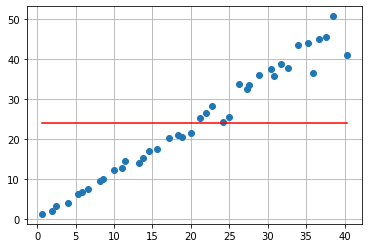

In [23]:
x = []
y = []
for n in range(0, 40):
    x.append(n + random.random() * 1 - 0.5)
    y.append((1 + random.random() / 3) * n)
    
plt.plot(x, y, linestyle=' ', marker='o')

y_model = [np.mean(y)] * len(y)
plt.plot(x, y_model, color='red')
plt.grid(True)

plt.show()

The blue plots are the actual data collected while the red line is the model. There is a difference between the modelled value and the actual value. This difference is known as the deviation or the residual.

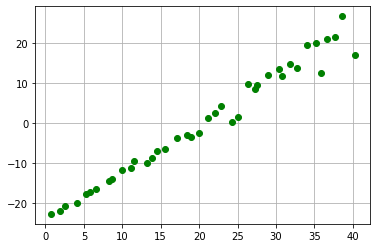

In [26]:
residuals = np.array(y) - np.array(y_model)
plt.plot(x, residuals, linestyle=' ', marker='o', color='green')
plt.grid(True)
plt.show()

The above is the plot of the residuals. Notice how the residuals are evenly spread above and below zero. In order to find the actual deviations, we need to square it

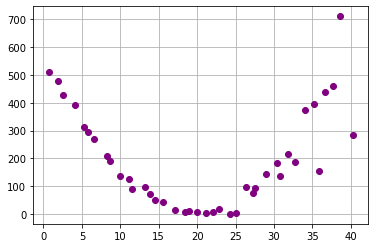

RSS: 7725.4634


In [43]:
residuals_squared = residuals**2
plt.plot(x, residuals_squared, linestyle=' ', marker='o', color='purple')
plt.grid(True)
plt.show()

print("RSS: {:0.4f}".format(sum(residuals_squared)))

Now all the residuals are represented by positive numbers, aka residual squared sum (RSS). Squaring also punishes larger residuals. Overall, we want to minimise this difference. 

**$RSS = \sum (y_{model} - y_{data})^2$**

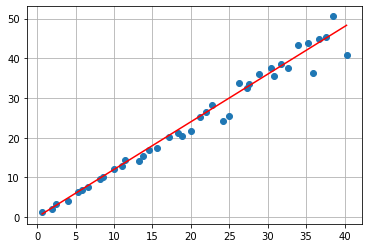

In [51]:
a0 = 0
a1 = 1.2
y_model = a0 + a1 * np.array(x)

plt.plot(x, y, linestyle=' ', marker='o')
plt.plot(x, y_model, color='red')
plt.grid(True)

plt.show()

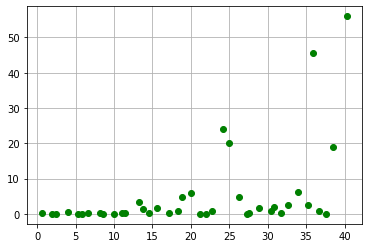

RSS: 208.4110


In [52]:
residuals_squared = (np.array(y) - np.array(y_model))**2
plt.plot(x, residuals_squared, linestyle=' ', marker='o', color='green')
plt.grid(True)
plt.show()

print("RSS: {:0.4f}".format(sum(residuals_squared)))

Using the right values for a0 and a1 give us a better value of RSS. Hence, we have optimized the values for our model.

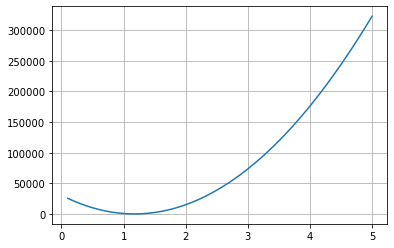

In [62]:
rss = []

for n in np.arange(0.1, 5.1, 0.1):
    y_model = 0 + n * np.array(x)
    rss.append(sum((y_model - np.array(y))**2))
    
plt.plot(np.arange(0.1, 5.1, 0.1), rss)
plt.grid(True)
plt.show()

Plotting the rss against a1, we can also see that the minima is indeed around 1.2.

## Least-Squares Optimization

Using calculus, we find that:  
**$a_1 = Covariance(x, y)/Variance(x)$**  
**$a_0 = Mean(y) - a_1 \times Mean(x)$**

In [63]:
import numpy as np

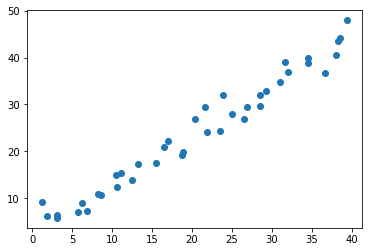

In [64]:
x = []
y = []
for n in range(0, 40):
    x.append(n + random.random() * 2 - 1)
    y.append((1 + random.random() / 3) * n + random.random() * 10 / n)
x = np.array(x)
y = np.array(y)

plt.plot(x, y, linestyle=' ', marker='o')
plt.show()

In [68]:
x_mean = np.mean(x)
y_mean = np.mean(y)

x_dev = x - x_mean
y_dev = y - y_mean

cov = np.mean(x_dev * y_dev)
x_var = np.mean(x_dev**2)

a1 = cov/x_var
a0 = y_mean - a1 * x_mean

print("a0: {:0.4f}".format(a0))
print("a1: {:0.4f}".format(a1))

a0: 2.8273
a1: 1.0377


For more complex models, there might not be algebriac models. We can use packages to optimize our models instead.

In [69]:
from scipy import optimize

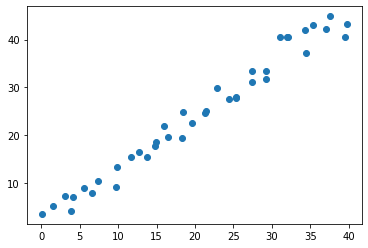

In [70]:
x = []
y = []
for n in range(0, 40):
    x.append(n + random.random() * 2 - 1)
    y.append((1 + random.random() / 3) * n + random.random() * 10 / n)
x = np.array(x)
y = np.array(y)

plt.plot(x, y, linestyle=' ', marker='o')
plt.show()

In [73]:
def model_func(x, a0, a1):
    return a0 + a1 * x

param_opt, param_cov = optimize.curve_fit(model_func, x, y) # use curve_fit function to vary a0 and a1 to fit

a0 = param_opt[0]
a1 = param_opt[1]

print("a0: {:0.4f}".format(a0))
print("a1: {:0.4f}".format(a1))

a0: 2.0971
a1: 1.0926


Similarly, we can use ols from the statsmodels.formula.api package.